# Operaciones básicas de procesado de imágenes 

Describiré a continuación algunas operaciones de procesado de imágenes

In [1]:
import cv2
import numpy as np
import cuia

In [2]:
chicky = cv2.imread("media/chicky_512.png")

## Rotación

La función [rotate](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga4ad01c0978b0ce64baa246811deeac24) rota una imagen en múltiplos de 90 grados en función de una argumento de [tipo de rotación](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga6f45d55c0b1cc9d97f5353a7c8a7aac2)

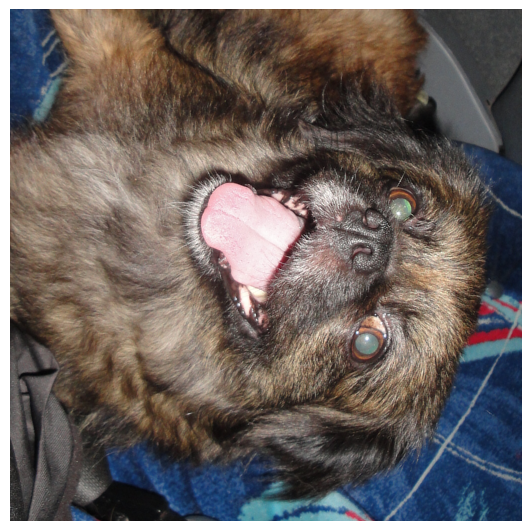

In [3]:
res = cv2.rotate(chicky, cv2.ROTATE_90_CLOCKWISE)
cuia.plot(res)

## Efecto espejo

El efecto espejo consiste en intercambiar la posición de los píxeles de una imagen con los de la posición contraria del eje X, del eje Y o de ambos simultáneamente. Esto se consiggue mediante [flip](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441). El parámetro *flipCode* se usa para indicar el tipo de espejo (0 para el eje X, 1 para el eje Y y -1 para ambos a la vez)

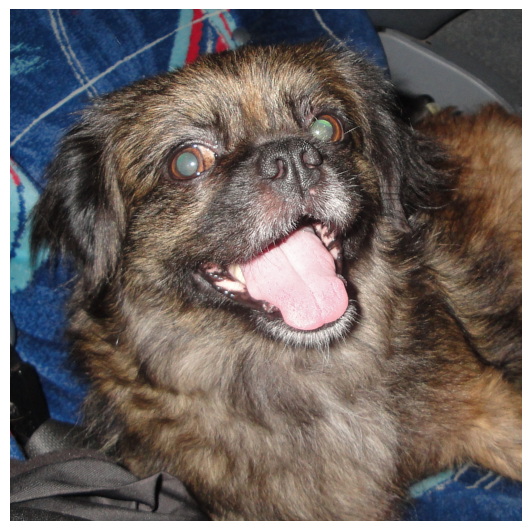

In [4]:
res = cv2.flip(chicky, flipCode=1)
cuia.plot(res)

## Escalado

La función [resize](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) permite cambiar el tamaño de una imagen. Para indicar el tipo de cambio tenemos dos opciones:
* Indicar el tamaño objetivo mediante el parámetro *dsize*. Por ejemplo *dsize=(450,300)*
* Indicar el factor de escalado mediante los parámetros *fx* y *fy*
    * Para especificar factores de escalado es necesario indicar explícitamente que no se usará el parámetro *dsize* mediante *dsize=None*
    * Un valor inferior a 1 reduce el tamaño, un valor superior aumenta el tamaño y un valor exactoi de 1 mantiene el tamaño. 
    * Los vallores de *fx* y *fy* deben ser superiores a cero. Si *fy=fx* entonces el escalado conserva la relación de aspecto.

Hay que tener en cuenta que no podemos emplear las dos opciones a la vez en la misma operación de escalado.

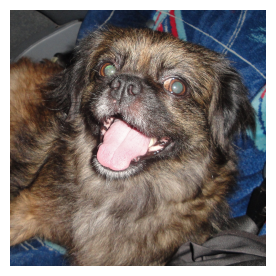

In [5]:
minichicky = cv2.resize(chicky, dsize=None, fx=0.5, fy=0.5)
cuia.plot(minichicky)

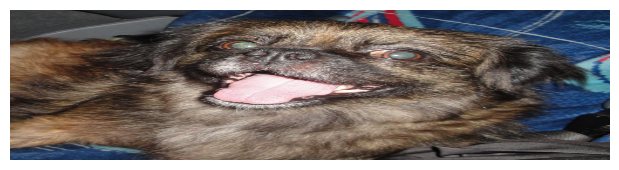

In [6]:
chiiiky = cv2.resize(chicky, dsize=(600, 150))
cuia.plot(chiiiky)

## Transformación afín

Una [transformación afín](https://docs.opencv.org/4.x/d4/d61/tutorial_warp_affine.html) es una deformación de una imagen que le aplica rotación, traslación y escalado. Se representa en forma de matriz 2x3.

**Nota:** Una transformación afín no modifica la condición de paralelismo de las líneas de la imagen original. Es decir, las paralelas se mantienen paralelas.

Para obtener la matriz de transformación afín asociada a una rotación podemos usar la función [getRotationMatrix2D](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326) que tiene por parámetros:
* Punto de la imagen alrededor del cual se realizará la rotación
* Ángulo de rotación (en grados). Los valores positivos realizan la rotación en sentido contrario a las agujas del reloj
* Escala. Valor mayor que cero que indica el escalado que se aplicará manteniendo centrado el punto de rotación. Reduce el tamaño con valores inferiores a 1 y lo aumenta con valores superiores a 1. Recomiendo no usar valores distintos de cero pues su comportamiento no es intuitivo.

In [11]:
# Matriz de transformación afín de una rotación de 45 grados en sentido contrario a las agujas del reloj alrededor del punto (256,256) y sin realizar escalado
M = cv2.getRotationMatrix2D((256,256), 45, 1)

Para aplicar una transformación afín a una imagen usamos la función [warpAffine](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) indicando la matriz de transformación afín y el tamaño de la imagen resultante (tras la transformación de la imagen se recorta al tamaño indicado y se rellena con color negro los huecos.

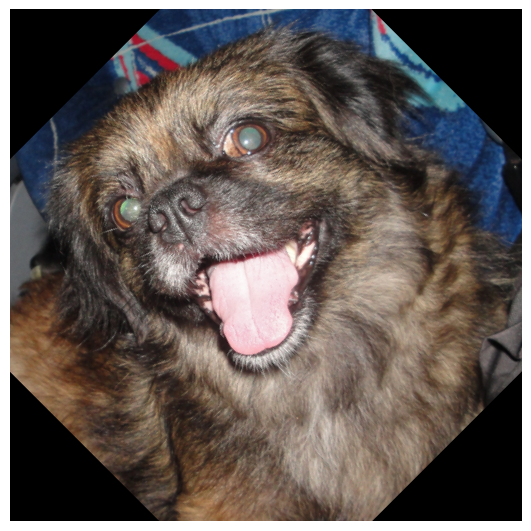

In [12]:
res = cv2.warpAffine(chicky, M, chicky.shape[0:2])
cuia.plot(res)

Para hacer una transformación afín genérica necesitamos calcular una transformación de 3 puntos de la imagen original en 3 puntos de la imagen destino. La matriz de transformación afín obtenida representa la traslación, rotación y escalado que hay que aplicar a la imagen original para que los píxeles que están dentro del triángulo aparezcan en el triángulo de la imagen final. Esto se consigue con la función [getAffineTransform](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga8f6d378f9f8eebb5cb55cd3ae295a999)

Para comprobar el efecto dibujaré los triángulos en las imagen original y final.

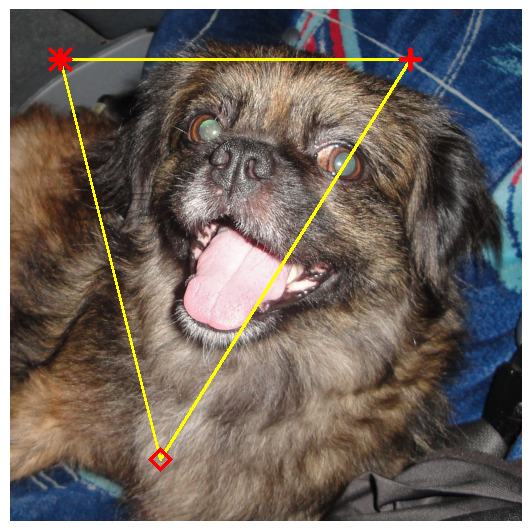

In [45]:
res = chicky.copy()
puntos_original = [ [50,50], [400,50], [150,450] ]
cv2.line(res, puntos_original[0], puntos_original[1], color=(0,255,255), thickness=2)
cv2.line(res, puntos_original[1], puntos_original[2], color=(0,255,255), thickness=2)
cv2.line(res, puntos_original[2], puntos_original[0], color=(0,255,255), thickness=2)
cv2.drawMarker(res, puntos_original[0], (0,0,255), cv2.MARKER_STAR, thickness=3)
cv2.drawMarker(res, puntos_original[1], (0,0,255), cv2.MARKER_CROSS, thickness=3)
cv2.drawMarker(res, puntos_original[2], (0,0,255), cv2.MARKER_DIAMOND, thickness=3)
cuia.plot(res)

Ahora definimos los puntos en la imagen final y obtenemos la transformación en la que dibujaremos el triángulo para comprobar la relación con el original.

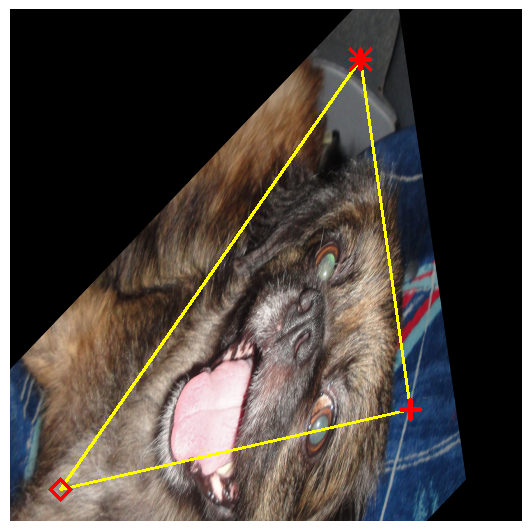

In [55]:
puntos_final = [ [350,50], [400,400], [50,480] ]
M = cv2.getAffineTransform(np.array(puntos_original, dtype=np.float32), np.array(puntos_final, dtype=np.float32))
res = cv2.warpAffine(chicky, M, chicky.shape[0:2])
cv2.line(res, puntos_final[0], puntos_final[1], color=(0,255,255), thickness=2)
cv2.line(res, puntos_final[1], puntos_final[2], color=(0,255,255), thickness=2)
cv2.line(res, puntos_final[2], puntos_final[0], color=(0,255,255), thickness=2)
cv2.drawMarker(res, puntos_final[0], (0,0,255), cv2.MARKER_STAR, thickness=3)
cv2.drawMarker(res, puntos_final[1], (0,0,255), cv2.MARKER_CROSS, thickness=3)
cv2.drawMarker(res, puntos_final[2], (0,0,255), cv2.MARKER_DIAMOND, thickness=3)
cuia.plot(res)

Podemos definir transfoormaciones que no respeten el paralelismo de la imagen original. Estas las definiremos mediante una matriz de transformación que represente la relación de 4 puntos de la imagen original con respecto a 4 puntos de la imagen destino. La función empleada es [getPerspectiveTransform](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gae66ba39ba2e47dd0750555c7e986ab85)

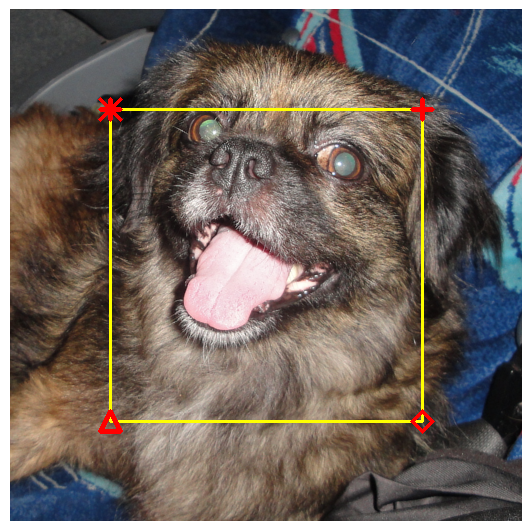

In [57]:
res = chicky.copy()
puntos_original = [ [100,100], [412,100], [412,412], [100,412] ]
cv2.line(res, puntos_original[0], puntos_original[1], color=(0,255,255), thickness=2)
cv2.line(res, puntos_original[1], puntos_original[2], color=(0,255,255), thickness=2)
cv2.line(res, puntos_original[2], puntos_original[3], color=(0,255,255), thickness=2)
cv2.line(res, puntos_original[3], puntos_original[0], color=(0,255,255), thickness=2)
cv2.drawMarker(res, puntos_original[0], (0,0,255), cv2.MARKER_STAR, thickness=3)
cv2.drawMarker(res, puntos_original[1], (0,0,255), cv2.MARKER_CROSS, thickness=3)
cv2.drawMarker(res, puntos_original[2], (0,0,255), cv2.MARKER_DIAMOND, thickness=3)
cv2.drawMarker(res, puntos_original[3], (0,0,255), cv2.MARKER_TRIANGLE_UP, thickness=3)
cuia.plot(res)

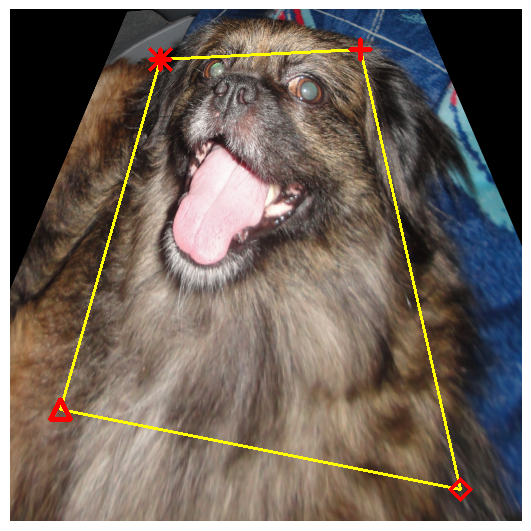

In [62]:
puntos_final = [ [150,50], [350,40], [450,480], [50,400] ]
M = cv2.getPerspectiveTransform(np.array(puntos_original, dtype=np.float32), np.array(puntos_final, dtype=np.float32))
res = cv2.warpPerspective(chicky, M, chicky.shape[0:2])
cv2.line(res, puntos_final[0], puntos_final[1], color=(0,255,255), thickness=2)
cv2.line(res, puntos_final[1], puntos_final[2], color=(0,255,255), thickness=2)
cv2.line(res, puntos_final[2], puntos_final[3], color=(0,255,255), thickness=2)
cv2.line(res, puntos_final[3], puntos_final[0], color=(0,255,255), thickness=2)
cv2.drawMarker(res, puntos_final[0], (0,0,255), cv2.MARKER_STAR, thickness=3)
cv2.drawMarker(res, puntos_final[1], (0,0,255), cv2.MARKER_CROSS, thickness=3)
cv2.drawMarker(res, puntos_final[2], (0,0,255), cv2.MARKER_DIAMOND, thickness=3)
cv2.drawMarker(res, puntos_final[3], (0,0,255), cv2.MARKER_TRIANGLE_UP, thickness=3)
cuia.plot(res)